# Energy Data Exploring

The task statement. We have observation for more than 1000 buildings including time stamps, gas consumptions, so on and idea to explore the types of daily patterns. 

## Task 1. Load data from the files

In [1]:
%matplotlib inline
#include libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import neurolab as nl

# import pybrain as pb
# from pybrain.tools.shortcuts import buildNetwork
# from pybrain.structure import TanhLayer
# from pybrain.datasets import SupervisedDataSet
# from pybrain.supervised.trainers import BackpropTrainer

#SkLearn 
from numpy import linalg
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Step 1. Initialization Step

In [2]:
picture_width = 18
picture_height = 5
#
daily_pattern = 96
frequency = daily_pattern
forecast_horizon = 96
planning_horizon_interval = 2
training_set_points = forecast_horizon * planning_horizon_interval


maximum_value = 100000.
a = [1,2,3,4,5]
print(a[len(a)-1])

print (type(a))

b= pd.Series(a)
print (type(b))

5
<class 'list'>
<class 'pandas.core.series.Series'>


## Step 1.1 Load Data

In [3]:
path_to_data = 'c:/Users/maxim.shcherbakov/Dropbox/Thesis/exp/data/'
path_to_figures = 'c:/Users/maxim.shcherbakov/Dropbox/Thesis/exp/figures/'

bemtdata = pd.read_csv( path_to_data + 'bemt.csv', index_col=False, sep = ';', header=0)
bemtdata = bemtdata.set_index('ExpectedDateTime')
# list(bemtdata.columns.values)


#load_data_in the loop
load_data = []

for i in range(1):
    load_data[len(load_data):] = [ pd.read_csv( path_to_data + 'bemt.csv', index_col=False, sep = ';', header=0) ]

load_data[0].head(5)

,ExpectedDateTime,Openning_hours,DateTime,Consumption_BEMT,Network_electricity active Injection Export (Wh),Ele Act Technobo (Wh),Radiation (VA),Electricity Meter reading (Wh),Solar local consumption (Wh),Gas Consumption BEMT (m³),Solar Production elektricity active (Wh),Green energy Total (WebService) (VA),temp hall (C),Network electricity active Buying Import (Wh),Tout (C)
0,31-12-2012 00:15,0,31-12-2012 00:15,39900,0,38400,NaN,NaN,0,10.0,0,0,19.94,39900,7
1,31-12-2012 00:30,0,31-12-2012 00:30,38500,0,37500,NaN,NaN,0,0.0,0,0,19.70,38500,7
2,31-12-2012 00:45,0,31-12-2012 00:45,39900,0,38700,NaN,NaN,0,5.2,0,0,19.92,39900,7
3,31-12-2012 01:00,0,31-12-2012 01:00,39900,0,38400,NaN,NaN,0,5.2,0,0,19.96,39900,7
4,31-12-2012 01:15,0,31-12-2012 01:15,40600,0,39000,NaN,NaN,0,5.6,0,0,19.95,40600,7


## Step 1.2 Explore the time series. Visualising.

In [4]:
energy_consumption = bemtdata['Consumption_BEMT']
tout = bemtdata['Tout (C)']
tinside = bemtdata['temp hall (C)']
# gas = bemtdata['Gas Consumption BEMT (m³)']
solar = bemtdata['Solar Production elektricity active  (Wh)']
network = bemtdata['Network_electricity active Injection Export (Wh)']
network_buy = bemtdata['Network  electricity active Buying Import (Wh)']
eleact = bemtdata['Ele Act Technobo (Wh)']
# gascons = bemtdata['Gas Consumption BEMT (m\xc2\xb3)']

energy_consumption['31-12-2012 00:15']

39900.0

40992

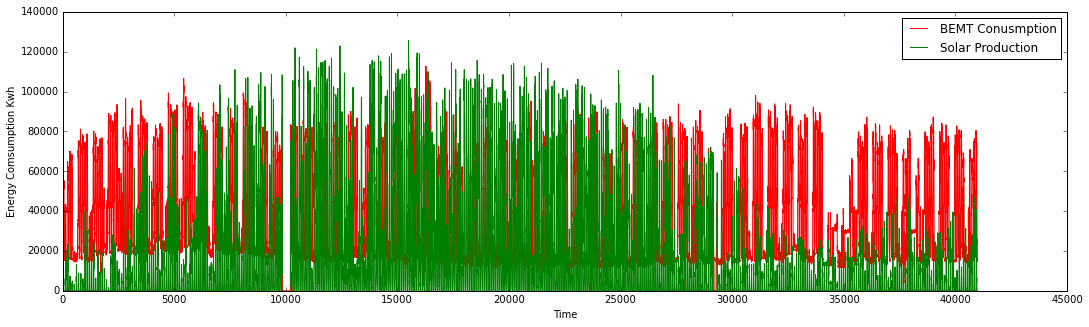

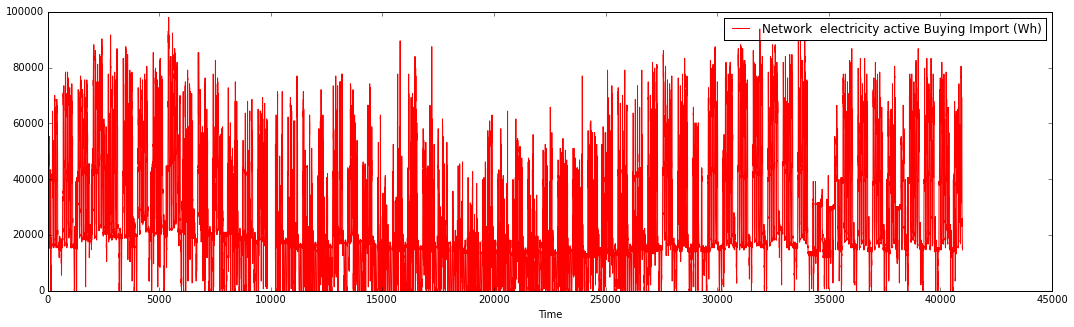

In [5]:


plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
plt.plot(  energy_consumption, 'r-', label = 'BEMT Conusmption')
plt.plot(solar, 'g-', label = 'Solar Production')
plt.xlabel('Time')
plt.ylabel('Energy Comsumption Kwh')
plt.legend(loc = 'upper right')
plt.savefig(path_to_figures + 'bemt_consumption.png')

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=500, facecolor='w', edgecolor='k')
#plt.plot( network, 'r-', label = 'Network_electricity active Injection Export (Wh)')
#plt.plot(eleact, 'r-', label = 'Ele Act Technobo (Wh)')
plt.plot(network_buy, 'r-', label = 'Network  electricity active Buying Import (Wh)')

plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.savefig(path_to_figures + 'bemt_consumption.png')

len(energy_consumption)

In [6]:
#try to select
# x = [1,2,3,4,5,6,7,8,9,10]
# x[::3]
# z = 0
# i = 0
# print energy_consumption[1]
# ec = pd.Series(data=None)
# ec = energy_consumption[0:len(energy_consumption)]
    
# ds = SupervisedDataSet(2, 1)

# # print type(ec)
# start_time = time.time()
# print("--- %s start_time ---" % start_time)

# for i in range(len(ec)-1, 2, -1):
# #     ds.addSample((ec[i-2], ec[i-1]),(ec[i]))   
#     ds.addSample((energy_consumption[i-2], energy_consumption[i-1]),(energy_consumption[i]))   
#     z = z + ec[i]

# print "z = ", z
# stop_time = time.time() - start_time
# print("---executed in %s seconds ---" % stop_time)


# from itertools import islice

# def window(seq, n=2):
#     "Returns a sliding window (of width n) over data from the iterable"
#     "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
#     it = iter(seq)
#     result = tuple(islice(it, n))
#     if len(result) == n:
#         yield result    
#     for elem in it:
#         result = result[1:] + (elem,)
#         yield result
# x = [1,2,3,4,5,6,7,8,9,10]
# z = window(x, 2)
# print z

## Step 2. Benchmark Model Forecasting

In [17]:
#mae
def calculateAccuracyUsingMAE(data_predicted, data_measured):
    zip_data = zip(data_predicted, data_measured)
    mae = 0
    for i in range(len(zip_data)):
        mae = abs(zip_data[i][0] -zip_data[i][1]) 
    mae = mae / len(data_predicted)
    return mae


#mape
def calculateAccuracyUsingMAPE(data_predicted, data_measured):    
    zip_data = zip(data_predicted, data_measured)
    mape = 0
    cx = 0
    i = 0
    for i in range(len(zip_data)):
        if zip_data[i][1] != 0.:
            mape = abs(zip_data[i][0] -zip_data[i][1]) / float(zip_data[i][1])
            cx = cx + 1
        i = i +1    
    mape = mape / float(cx)
    return mape * 100


In [19]:
# ForecastingModel is the abstract class
class ForecastingModel:
    name = ''  
    
    def __init__(self, name):
        self.name = name
    def forecast(self, data, h, frequency):
        return None

# ForecastingModelNaive use forecast based on naive model
class ForecastingModelNaive(ForecastingModel):
        
    def forecast(self, data, h, frequency):
        data_predicted = None
        try:
            data_predicted = data[len(data) - h:len(data)]
        except:        
            print ('error during the prediction!!!')
            data_predicted = None
        return data_predicted; 

# ForecastingModelSimpleAverage use forecast based on simple average
class ForecastingModelSimpleAverage(ForecastingModel):
    lag_parameter = 4
    def forecast(self, data, h, frequency):
        
        data_predicted = []
        try:
            for i in range(h):
                tmp = 0.
                for j in range(self.lag_parameter):
                    tmp = tmp + data[len(data) - 1 - daily_pattern*7*(j+1) + i]                    
#                 data_predicted[len(data_predicted):] = [ (data[len(data) - 1 - 96*7 + i] + data[len(data) - 1 - 96*7*2 + i])/2.0]
                data_predicted[len(data_predicted):] = [ (tmp)/float(self.lag_parameter)]
        except:        
            print ('ForecastingModelSimpleAverage: Error during the prediction!!!')
#         data_predicted_2 = pd.Series(data_predicted)
        return pd.Series(data_predicted); 
        

class ForecastingModelNeuralNetworksNeuroLab(ForecastingModel):
    
    net = None    
    lag_parameter = 4
    error_array = []
    
    def train(self, data):
#         prepare input & target
        self.net = nl.net.newff([[0,1],[0,1],[0,1],[0,1]],[15,15, 1])
        input = []
        target = []    
        input_unit = []
        target_unit = 0
#         for j in range(40000,len(data)):
        for j in range(len(data) - 1, len(data) - (2*planning_horizon_interval)*96, -1 ):
            input_unit[:] = []
            target_unit = 0
            for lag in range(self.lag_parameter):
                input_unit.append(data[j - daily_pattern*7*(lag+1)])
            target_unit = data[j]
            input.append(input_unit)
            target.append([target_unit])   
        
        print ("training procesure: start")
        input2 = np.divide(input, maximum_value)
#         print "input2", input2
        target2 = np.divide(target, maximum_value)
#         print "target2", target2
#         self.error_array = self.net.train(input2, target2,  epochs=5000, show=1, goal=0.01)
        self.error_array = self.net.train_gdm(input2, target2,  epochs=5000, show=1, goal=0.01)

#         print "self.error_array ", self.error_array 
        print ("training procesure: finished")
        
#         print self.target        
#             input_unit[len(input_unit):] = []
# train nns        
         
        
    def forecast(self, data, h, frequency):
        input_unit = []
        data_predicted = []
        for i in range(h):
            input_mas = []
#             input_mas2[:] = [] 
            input_unit[:] = [] 
            for lag in range(self.lag_parameter):
                input_unit.append(data[len(data) - 1 - 96*7*(lag+1) + i])
            input_mas.append(input_unit)
            input_mas2 = np.divide(input_mas, maximum_value)            
#             print 'input_mas2', input_mas2
#             print 'data_predicted', data_predicted
            res = self.net.sim(input_mas2) * maximum_value
#             print 'type(res)',  type(res)
            data_predicted[len(data_predicted):] = [res]                  
        return pd.Series(data_predicted); 
    
    def getErrorArray(self):
        return self.error_array
    
        
# #naive model
# def doForecastNaiveModel(data, h, frequency):
#     data_predicted = None
#     try:
#         data_predicted = data[len(data) - h:len(data)]
#     except:        
#         print ('error during the prediction!!!')
#         data_predicted = None
#     return data_predicted; 



In [21]:
class ForecastingModelNeuralNetworksPyBrain(ForecastingModel):
    net = None
    trainer = None
    ds = None
    inputs_count = 0
    output_count = 0
    lag_parameter = 0
    
    def build(self, inputs_count, output_count):
        self.net = buildNetwork(inputs_count, 5, output_count, bias=True, hiddenclass=TanhLayer)
        self.inputs_count = inputs_count
        self.output_count = output_count
        
    def createDataSet (self, training_dataset, lag_parameter):
        print ('createDataSet: Start')
        start_time = time.time()
        print("--- %s start_time ---" % start_time)
        input_unit = []
        self.lag_parameter = lag_parameter
        self.ds = SupervisedDataSet(self.inputs_count, self.output_count)
        #create training set
        for j in range(len(training_dataset) - 1, len(training_dataset) - (2*planning_horizon_interval)*daily_pattern, -1 ):
            input_unit[:] = []
            target_unit = 0
            for lag in range(lag_parameter):
                input_unit.append(training_dataset[j - daily_pattern*7*(lag+1)])
#                 input_unit.append(training_dataset[j - (lag+1)])
            target_unit = training_dataset[j]
# #             #start normalization
#             input_unit = np.divide(input_unit, maximum_value)         
#             target_unit = target_unit 
#             #--            
            self.ds.addSample((np.divide(input_unit, maximum_value)),(target_unit / maximum_value))            
        stop_time = time.time() - start_time
        print("---executed in %s seconds ---" % stop_time)
        print ('createDataSet: Stop')
#             input.append(input_unit)
#             target.append([target_unit])          
#         print "training procesure: start"
#         input2 = np.divide(input, maximum_value)
#         target2 = np.divide(target, maximum_value)
        
    
    def train(self, maximum_iterations):
        error_array = []
        print ('ForecastingModelNeuralNetworksPyBrain: Start')
        start_time = time.time()
        print("--- %s start_time ---" % start_time)        
        self.trainer = BackpropTrainer(self.net, self.ds)
#         error_conv = self.trainer.trainUntilConvergence()
        for i in range(maximum_iterations):
            current_error = self.trainer.train()
            error_array[len(error_array):] = [current_error]
            
        print ('ForecastingModelNeuralNetworksPyBrain: Stopped')
        stop_time = time.time() - start_time
        print("---executed in %s seconds ---" % stop_time)        
        return error_array
    
    def forecast(self, data, h, frequency):
        input_unit = []
        data_predicted = []
        for i in range(h):
            input_mas = []
#             input_mas2[:] = [] 
            input_unit[:] = [] 
            for lag in range(self.lag_parameter):
                input_unit.append( (data[ (len(data) - 1) + i - daily_pattern*7*(lag + 1)])) 
#             input_mas.append(input_unit)
#             print 'input_unit', input_unit
            res = self.net.activate(np.divide(input_unit, maximum_value))
            data_predicted[len(data_predicted):] = [res  * maximum_value]                 
        return pd.Series(data_predicted);    

# Run Batch Procedure for automation forecasting

In [24]:
#short interval of observations
#energy_consumption


# print energy_consumption.head(5)

#need to add list for models, buildings, measures

mae_list = []
mape_list = []
measured_datset_overall = pd.Series(data=None)
predicted_dataset_overall = pd.Series(data=None)

naive_forecast = ForecastingModelNaive('naive')
sam_forecast = ForecastingModelSimpleAverage('simple averge model')
nns = ForecastingModelNeuralNetworksNeuroLab('nns')

bpnns = ForecastingModelNeuralNetworksPyBrain('PyBrain NNS')

models = []
models[len(models):] = [naive_forecast]
models[len(models):] = [sam_forecast]

#initial: substract from initial time series planning_horizon_interval interval with set frequency
#energy_data_m = range(96*7)
# pieces = pd.Series
# for interval in range(planning_horizon_interval):
first_time_execution = True
for interval in range(planning_horizon_interval):
#   points - numbers outsample observes  
    points = frequency * (planning_horizon_interval - interval)
#     print points
#     initial_data_batch = energy_consumption[0: len(energy_consumption) - points]
    training_dataset =  energy_consumption[0: len(energy_consumption) - points]
#     print 'do forecast for %d interval', interval, len(initial_data_batch)
    #prepare data_measures list
    
#     data_measured = energy_consumption[len(energy_consumption) - points: len(energy_consumption) - points + frequency]
    testing_dataset = energy_consumption[len(energy_consumption) - points: len(energy_consumption) - points + frequency]
    
    
#     data_predicted = naive_forecast.forecast(initial_data_batch, forecast_horizon, frequency)
    predicted_dataset = naive_forecast.forecast(training_dataset, forecast_horizon, frequency)
#     print type(data_predicted)

#     predicted_dataset = sam_forecast.forecast(training_dataset, forecast_horizon, frequency)
#     print type(data_predicted_2)

#     nns.init()
#     if first_time_execution == True:
#         print("start creating datasets")
#         bpnns.build(4,1)
#         bpnns.createDataSet(training_dataset, 4)     
#         print("stop creating datasets")
#         bpnns.train(100)
#     predicted_dataset = bpnns.forecast(training_dataset, forecast_horizon, frequency)
        
#         nns.train(training_dataset)    
#         print("finish training")
    
#     predicted_dataset = nns.forecast(training_dataset, forecast_horizon, frequency)
#     print "nns.getErrorArray", nns.getErrorArray()


    #     print "predicted_dataset", predicted_dataset
#     doForecastNaiveModel(initial_data_batch, forecast_horizon, frequency)
    
    measured_currentbatch = [measured_datset_overall, testing_dataset]

    measured_datset_overall = pd.concat(measured_currentbatch)
    predicted_dataset_overall = pd.concat([predicted_dataset_overall, predicted_dataset])

#     mae = calculateAccuracyUsingMAE(data_predicted, data_measured)
    mae = calculateAccuracyUsingMAE(predicted_dataset, testing_dataset)
    mae_list[len(mape_list):] = [mae]
    
#     mape = calculateAccuracyUsingMAPE(data_predicted, data_measured)
    mape = calculateAccuracyUsingMAPE(predicted_dataset, testing_dataset)
    mape_list[len(mape_list):] = [mape]
    first_time_execution = False
    
    
    
print ('MAE = ', mae_list)
print ('MAPE = ', mape_list)
  
# print type(data_measured_overall)
# print 'len=', len(data_predicted)
print ('mape.avg():', 100*sum(mape_list)/len(mape_list))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
plt.plot(predicted_dataset_overall, 'r-')
plt.plot(measured_datset_overall, 'b-')
plt.savefig(path_to_figures + 'vstu_consumption.png')

# print len(data_measured_overall)

# plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(mape_list, 'r-')
# plt.savefig(path_to_figures + 'vstu_consumption_2.png')


TypeError: object of type 'zip' has no len()

In [11]:
print len(bpnns.ds)

TypeError: object of type 'NoneType' has no len()

In [ ]:
#list(bemtdata.columns.values)

#df.rename(columns={'$a': 'a', '$b': 'b'}, inplace=True)
bemtdata['Tout (C)'].head(5)

plt.figure(num=None, figsize=(picture_width/3, picture_height), dpi=300, facecolor='w', edgecolor='k')
plt.plot(tout, 'b-', label = 'Temperature Outside')
plt.plot(gas, 'r-', label = 'Gas Consumption')
plt.plot(tinside, 'm-', label = 'Inside Temperature')

plt.xlabel('Time')
plt.ylabel('Temperature Outside, Cels')
plt.legend(loc = 'upper left')
plt.savefig(path_to_figures +  'bemt_toutside.png')


## Task2. Detection states of the objects over short observation periods.

In [ ]:
bemtdata.head(5)



In [ ]:
bemtdata['Tout (C)']['31-12-2012 00:15']

Define the function for plotting daily patterns

In [ ]:

def plotdaily_patterns(timeseries, daily_pattern_factor, name_of_timeseries):
    data_fraction_list = []
#     dfl = np.array([])
    plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
    l = len(timeseries) / daily_pattern_factor
    cx = 0
    for i in range(0,l):
        data_fraction = timeseries[i*daily_pattern_factor: i*daily_pattern_factor + daily_pattern_factor - 1]
#         data_fraction_list[len(data_fraction_list):] = [data_fraction]
        data_fraction_list.append([data_fraction])
        plt.plot(data_fraction, 'r-', label = name_of_timeseries)    
    plt.xlabel('Time')
    plt.ylabel(name_of_timeseries)
    return data_fraction_list

In [ ]:
week = energy_consumption[0:96]
# week


# f = open(path_to_figures + '\workfile.txt', 'w')
# f.write(str(week)

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
plt.plot(week, 'r-', label = 'Energy Consumption')
plt.xlabel('Time')
#plt.ylabel('Energy Consumption')
#plt.legend(loc = 'upper left')

#energy
data_fraction_list = plotdaily_patterns(energy_consumption, daily_pattern, 'Energy Consumption')
# plotdaily_patterns(gas, daily_pattern, 'Gas Consumption')

print type(data_fraction_list)



### Clustering

427.0
False
Silhouette Coefficient (K Means): 0.582
Silhouette Coefficient (MB Means): 0.550


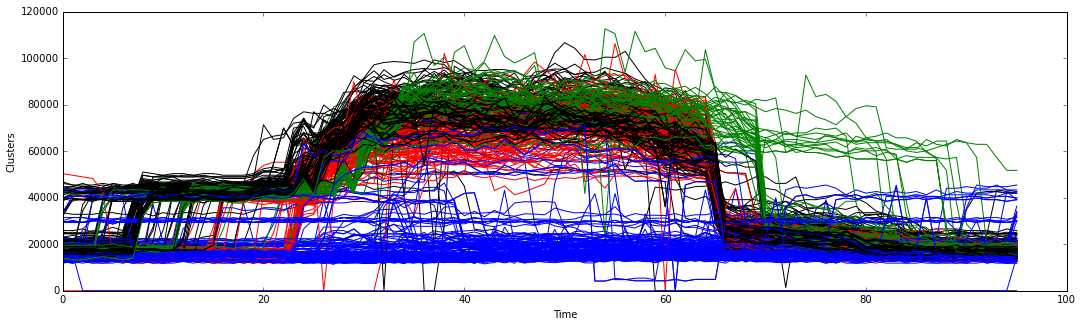

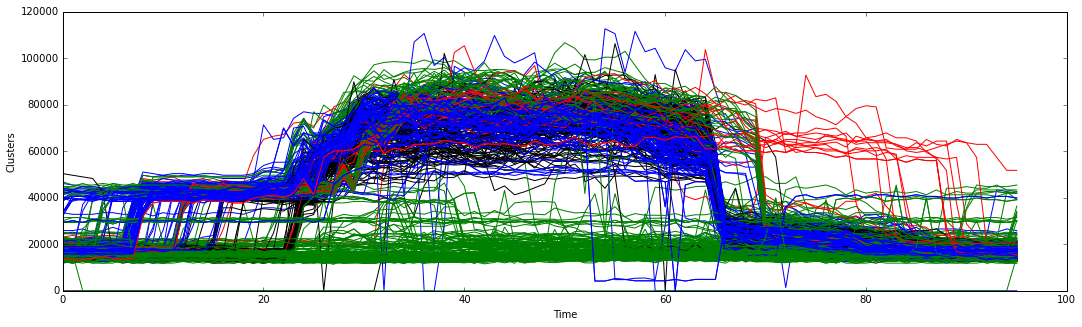

In [27]:


l = len(energy_consumption) / daily_pattern
print (l)

# patterns = np.zeros(l)
# patterns[0] = [0,1,2,4,34]
# print patterns

patterns = np.array(energy_consumption)
patterns.shape = (l, daily_pattern)

#eliminate the masks
mask = np.isnan(patterns)
patterns[mask] = patterns[0][0]
# print mask

# ind = np.where(~np.isnan(patterns))[0]
# first, last = ind[0], ind[-1]
# patterns[:first] = patterns[first]
# patterns[last + 1:] = patterns[last]

# print len(patterns)
# print patterns[2]

number_of_clusters = len(patterns)

n_clusters_en = 5

pt = patterns[:number_of_clusters:]
# print pt

# centers_en = [patterns[0], patterns[len(patterns) - 1], patterns[0]]
# n_clusters_en = len(centers_en)

#K means
k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en.fit(pt)
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
k_means_cluster_centers_en = k_means_en.cluster_centers_
k_means_labels_unique_en = np.unique(k_means_labels_en)


#MBK
batch_size = 45
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters_en, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(pt)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.


print (np.isnan(np.min(energy_consumption)))

# # KMeans
# ax = fig.add_subplot(1, 3, 1)
# for k, col in zip(range(n_clusters_en), colors):
#     my_members = k_means_labels_en == k
#     cluster_center = k_means_cluster_centers_en[k]
#     ax.plot(pt[my_members, 0], pt[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
#     ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=6)
# ax.set_title('KMeans')
# ax.set_xticks(())
# ax.set_yticks(())
# plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
#     t_batch, k_means_en.inertia_))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
    if k_means_labels_en[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')


#MBK
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if mbk_means_labels[i] == 0:
        clr = 'r-'

    if mbk_means_labels[i] == 1:
        clr = 'b-'
        
    if mbk_means_labels[i] == 2:
        clr = 'g-'
        
    if mbk_means_labels[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')


print("Silhouette Coefficient (K Means): %0.3f"
      % metrics.silhouette_score(pt, k_means_labels_en, metric='sqeuclidean'))

print("Silhouette Coefficient (MB Means): %0.3f"
      % metrics.silhouette_score(pt, mbk_means_labels, metric='sqeuclidean'))

len(k_means_labels_en) 427
len(mbk_means_labels) 427


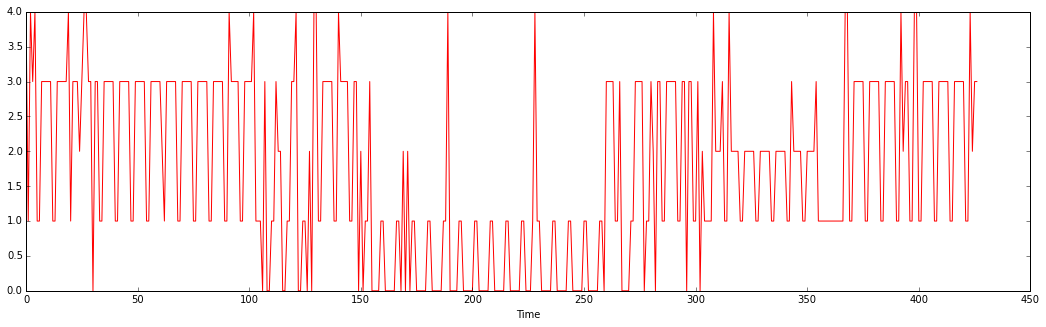

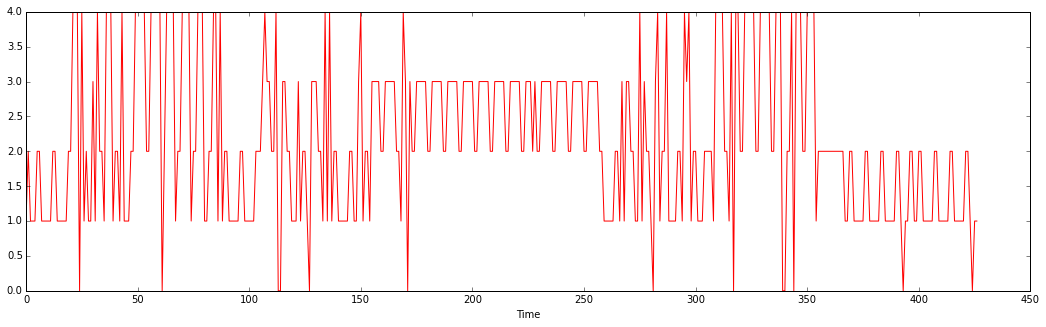

In [28]:
print ('len(k_means_labels_en)' , len(k_means_labels_en))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r-'
plt.plot(k_means_labels_en, clr, label = 'Label')    
plt.xlabel('Time')


print ('len(mbk_means_labels)' , len(mbk_means_labels))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r-'
plt.plot(mbk_means_labels, clr, label = 'Label')    
plt.xlabel('Time')




90


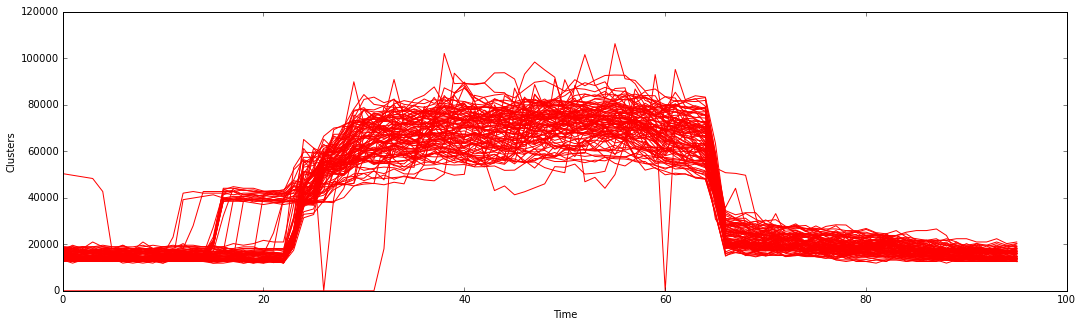

In [33]:
#draw each cluster


number_of_cluster = 0
mask= np.where(k_means_labels_en == number_of_cluster)
# k_means_labels_en[k_means_labels_en == 0]

# print mask
pt_0 = pt[mask]

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r-'
for i in range(0,len(pt_0)):
    plt.plot(pt_0[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')


print (len(pt_0))
# for i in range(0,len(pt)):
#     if k_means_labels_en[i] == 0:
        

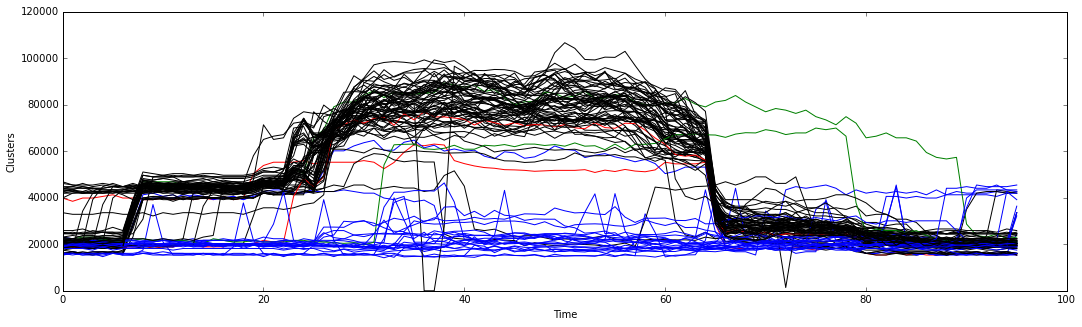

In [37]:
n_clusters_en = 3

k_means_en2 = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en2.fit(pt_0)
t_batch = time.time() - t0

k_means_labels_en2 = k_means_en2.labels_
k_means_cluster_centers_en2 = k_means_en2.cluster_centers_
k_means_labels_unique_en2 = np.unique(k_means_labels_en2)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.



# # KMeans
# ax = fig.add_subplot(1, 3, 1)
# for k, col in zip(range(n_clusters_en), colors):
#     my_members = k_means_labels_en == k
#     cluster_center = k_means_cluster_centers_en[k]
#     ax.plot(pt[my_members, 0], pt[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
#     ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=6)
# ax.set_title('KMeans')
# ax.set_xticks(())
# ax.set_yticks(())
# plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
#     t_batch, k_means_en.inertia_))





plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt_0)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
    if k_means_labels_en[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')

#PLEASE STOP HERE

In [36]:
af = AffinityPropagation(preference=-100).fit(pt)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pt, labels, metric='sqeuclidean'))

print (labels)

Estimated number of clusters: 390
Silhouette Coefficient: 0.141
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 103 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228

C:\Users\maxim.shcherbakov\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [ ]:
# checkTwoListsForEquality(a,b): a - list, b - list: return True if they are equal
def checkTwoListsForEquality(a,b):
    res = False
    cx = 0
    for i in range(len(a)):
        if a[i] == b[i]:
            cx = cx + 1
    if cx == len(a):
#     if (set(a) == set(b)):
        return True
    else:
        return False


In [ ]:
test_set_size = 9
window = 4



train_samples = k_means_labels_en[0:len(k_means_labels_en)-test_set_size]
test_samples = k_means_labels_en[len(k_means_labels_en)-test_set_size:len(k_means_labels_en)]
# print 'train_samples', train_samples
#play with this settings:

propability_array = [0] * 5#n_clusters_en
pattern = train_samples[len(train_samples)-window:len(train_samples)]
print 'pattern', pattern

for i in range(len(train_samples) - window):
    #generate string for searching
    current_pattern = train_samples[i:i+window]    
    #check: if pattern is equal to searching patter
    if (checkTwoListsForEquality(pattern, current_pattern) == True):   
#         print 'yes we found current_pattern' , current_pattern
        indx = train_samples[i+window]
        print 'indx = ', indx
        print 'pos = ', i+window
        propability_array[indx] = propability_array[indx] + 1

print 'propability_array', propability_array
# found max
m = max(propability_array)
max_pos = [i for i, j in enumerate(propability_array) if j == m]
print  max_pos[0]       
zeros = np.zeros(len(propability_array))

# print 'full ', k_means_labels_en
# print 'train_samples = ', train_samples
# print 'real_results = ', test_samples

len(k_means_labels_en)
# выборка из имеющегося массива